# Machine Learning

All machine learning models will be created in this document. CODE WITH ALGORITHMS WILL BE SCREENSHOT

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

all_df = pd.read_csv("../data/processed/cleaned.csv")
all_df = all_df.drop(["community_name"], axis = 1)
all_df["OtherPerCap"] = all_df["OtherPerCap"].astype("float64")

Splitting dataset

In [44]:
train,test = train_test_split(all_df, test_size = 0.2)

ONLY DO THIS IF YOU CAN EXPLAIN IT

A log transformation of the points will be neccessary if it is heavily skewed. By applying this transformation, it will be easier to create a regression model

/Users/aaronabraham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


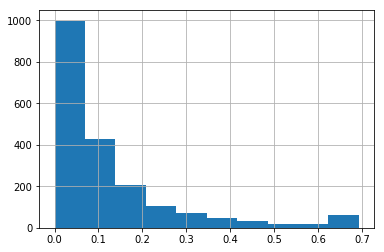

In [24]:
#log transform the target:
train["ViolentCrimesPerPop:"] = np.log1p(train["ViolentCrimesPerPop:"])

#log transform skewed numeric features:
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_df[skewed_feats] = np.log1p(all_df[skewed_feats])

all_df["racePctAsian"].hist()

## Modelling 

We will be using scikits inbuilt regression modules. We will try to tune the parameters based on RMSE scores.

In [53]:
y = train["ViolentCrimesPerPop:"]

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# Making RMSE function
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

We will first try a Ridge model. Ridge regression is used when there is multicollinearity among predictors. Given that there is bias in the dataset, this is most likely true. EVALUATE COLLINEARITY BASED ON HEATMAP

We will also optimize the Ridge model using cross-validation. We are optimizing the alpha value, which is a measure of how flexible the model will be. High alpha values might reduce problems of being overfit, but it might also lose predictive power.

Text(0,0.5,'rmse')

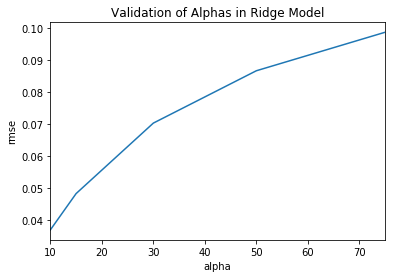

In [54]:
model_ridge = Ridge()

alphas = [ 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation of Alphas in Ridge Model")
plt.xlabel("alpha")
plt.ylabel("rmse")

Lets make our prediction off this alpha value:

In [ ]:
# Metrics for regression
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [43]:
train.dtypes

population                float64
householdsize             float64
racepctblack              float64
racePctWhite              float64
racePctAsian              float64
racePctHisp               float64
agePct12t21               float64
agePct12t29               float64
agePct16t24               float64
agePct65up                float64
numbUrban                 float64
pctUrban                  float64
medIncome                 float64
pctWWage                  float64
pctWFarmSelf              float64
pctWInvInc                float64
pctWSocSec                float64
pctWPubAsst               float64
pctWRetire                float64
medFamInc                 float64
perCapInc                 float64
whitePerCap               float64
blackPerCap               float64
indianPerCap              float64
AsianPerCap               float64
OtherPerCap                object
HispPerCap                float64
NumUnderPov               float64
PctPopUnderPov            float64
PctLess9thGrad

In [ ]:
y